In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Customers.csv')

In [4]:
df.head()

,age,income,gender,m_status,buys
0,25.0,high,male,single,no
1,25.0,high,male,married,no
2,35.0,high,male,single,yes
3,35.0,medium,male,single,yes
4,30.0,low,female,single,yes


In [5]:
df.isnull().sum()

age         2
income      0
gender      0
m_status    1
buys        0
dtype: int64

In [6]:
df[df['age'].isnull()]

,age,income,gender,m_status,buys
7,NaN,medium,male,married,no
14,NaN,high,male,single,no


In [7]:
df[df['m_status'].isnull()]

,age,income,gender,m_status,buys
6,22.0,low,female,NaN,yes


In [8]:
df.age.mean()

28.65

In [9]:
df.m_status.mode()

0    single
dtype: object

In [10]:
fillAge = df.age.mean()

In [11]:
df.age = df.age.fillna(fillAge)

In [12]:
df.m_status = df.m_status.fillna('single')

In [13]:
df.head(10)

,age,income,gender,m_status,buys
0,25.00,high,male,single,no
1,25.00,high,male,married,no
2,35.00,high,male,single,yes
3,35.00,medium,male,single,yes
4,30.00,low,female,single,yes
5,32.00,low,female,single,no
6,22.00,low,female,single,yes
7,28.65,medium,male,married,no
8,25.00,low,female,single,yes
9,35.00,medium,female,married,yes


In [14]:
df.isnull().sum()

age         0
income      0
gender      0
m_status    0
buys        0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [19]:
for columnn in df.columns:
    if df[columnn].dtype == np.number:
        continue
    df[columnn] = le.fit_transform(df[columnn])    

<ipython-input-19-eaf05e873e78>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[columnn].dtype == np.number:


In [21]:
df.head(10)

,age,income,gender,m_status,buys
0,25.00,0,1,1,0
1,25.00,0,1,0,0
2,35.00,0,1,1,1
3,35.00,2,1,1,1
4,30.00,1,0,1,1
5,32.00,1,0,1,0
6,22.00,1,0,1,1
7,28.65,2,1,0,0
8,25.00,1,0,1,1
9,35.00,2,0,0,1


In [25]:
x = df.drop('age', axis = 1)

In [26]:
y = df['age']

In [27]:
x.head()

,income,gender,m_status,buys
0,0,1,1,0
1,0,1,0,0
2,0,1,1,1
3,2,1,1,1
4,1,0,1,1


In [28]:
y.head()

0    25.0
1    25.0
2    35.0
3    35.0
4    30.0
Name: age, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .30, random_state = 12)

In [35]:
xtrain.shape

(15, 4)

In [36]:
ytrain.shape

(15,)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
li = LinearRegression()

In [40]:
li.fit(xtrain,ytrain)

LinearRegression()

In [41]:
li.coef_

array([4.16902159, 5.41855505, 2.1930152 , 0.1623567 ])

In [43]:
li.intercept_

21.06744868035191

Text(0.5, 1.0, 'Age calculation')

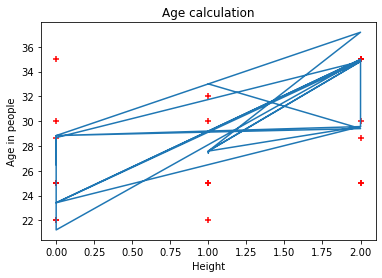

In [79]:
plt.plot(df.income, li.predict(x))
plt.scatter(df['income'],df.age, marker = '+',color = 'red')
plt.xlabel('Height')
plt.ylabel('Age in people')
plt.title('Age calculation')

In [54]:
xtrain.head()

,income,gender,m_status,buys
16,2,1,0,1
18,2,0,0,1
9,2,0,0,1
5,1,0,1,0
4,1,0,1,1


In [55]:
xtest.head()

,income,gender,m_status,buys
7,2,1,0,0
10,2,0,1,1
21,1,1,1,1
15,0,0,0,1
14,0,1,1,0


In [67]:
xtest.iloc[[0]]

,income,gender,m_status,buys
7,2,1,0,0


In [68]:
predict = li.predict(xtest.iloc[[0]])

In [69]:
predict

array([34.82404692])

In [80]:
mulPredict = li.predict(xtest)

In [81]:
mulPredict

array([34.82404692, 31.76086377, 33.01039723, 21.22980539, 28.67901893,
       27.59184218, 34.82404692])

In [58]:
ytest

7     28.65
10    25.00
21    25.00
15    25.00
14    28.65
8     25.00
13    35.00
Name: age, dtype: float64

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
mean_squared_error(ytest,mulPredict)

24.136916130435456

In [84]:
xtrain

,income,gender,m_status,buys
16,2,1,0,1
18,2,0,0,1
9,2,0,0,1
5,1,0,1,0
4,1,0,1,1
1,0,1,0,0
20,2,0,0,0
0,0,1,1,0
12,0,0,1,1
19,0,1,1,1


In [85]:
newTestData = [1, 0, 1 ,0]

In [87]:
li.predict([newTestData])

array([27.42948547])